# Load packages and data

In [1]:
import logging
import os
from typing import List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from DecisionTreeClassifier import (
    DecisionTreeClassifier as CustomDecisionTreeClassifier,
)
from RandomForestClassifier import (
    RandomForestClassifier as CustomRandomForestClassifier,
)
from rich import print
from sklearn.ensemble import RandomForestClassifier as SklearnRandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier
from sklearn.tree import plot_tree as plot_sklearn_tree

logging.basicConfig(level=logging.INFO)

%load_ext rich
%load_ext autoreload 

%autoreload 2

In [2]:
def print_evaluation_metrics(y_true, y_pred, model, name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred)

    print(f"Model: {name}")
    print(model)

    if hasattr(model, "oob_score_"):
        print(f"OOB Score: {model.oob_score_}")

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")

    print(f"Classification Report: \n{classification_report(y_true, y_pred)}")

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    plt.show()

    return {
        "name": name,
        "model": model,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm,
    }


In [3]:
data = pd.read_csv("../data/train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked", "Sex"]

data = data.dropna(subset=["Age", "Embarked"])
data = data.drop("PassengerId", axis=1)

X = data.drop("Survived", axis=1)[features]
y = data["Survived"]

X = pd.get_dummies(X, columns=["Embarked", "Sex"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
472,2,33.0,1,2,27.7500,False,False,True,True,False
432,2,42.0,1,0,26.0000,False,False,True,True,False
666,2,25.0,0,0,13.0000,False,False,True,False,True
30,1,40.0,0,0,27.7208,True,False,False,False,True
291,1,19.0,1,0,91.0792,True,False,False,True,False


# Decision Tree


## Custom implementation

In [8]:
clf = CustomDecisionTreeClassifier(max_depth=5, min_samples_split=15, max_features=5, debug=True)

clf.fit(X_train.values, y_train.values)


DEBUG:DecisionTreeClassifier:Starting to fit the model.
DEBUG:DecisionTreeClassifier:Considering features: [8 1 5 0 7]
DEBUG:DecisionTreeClassifier:Finding best split for feature 8
DEBUG:DecisionTreeClassifier:Finding best split for feature 1
DEBUG:DecisionTreeClassifier:Finding best split for feature 5
DEBUG:DecisionTreeClassifier:Finding best split for feature 0
DEBUG:DecisionTreeClassifier:Finding best split for feature 7
DEBUG:DecisionTreeClassifier:Best split found at feature 8 with threshold False and gain 0.2250996058839727
DEBUG:DecisionTreeClassifier:Splitting at depth 0: Feature 8 at threshold False, Left samples: 361, Right samples: 208
DEBUG:DecisionTreeClassifier:Considering features: [0 1 8 5 3]
DEBUG:DecisionTreeClassifier:Finding best split for feature 0
DEBUG:DecisionTreeClassifier:Finding best split for feature 1
DEBUG:DecisionTreeClassifier:Finding best split for feature 8
DEBUG:DecisionTreeClassifier:Finding best split for feature 5
DEBUG:DecisionTreeClassifier:Find

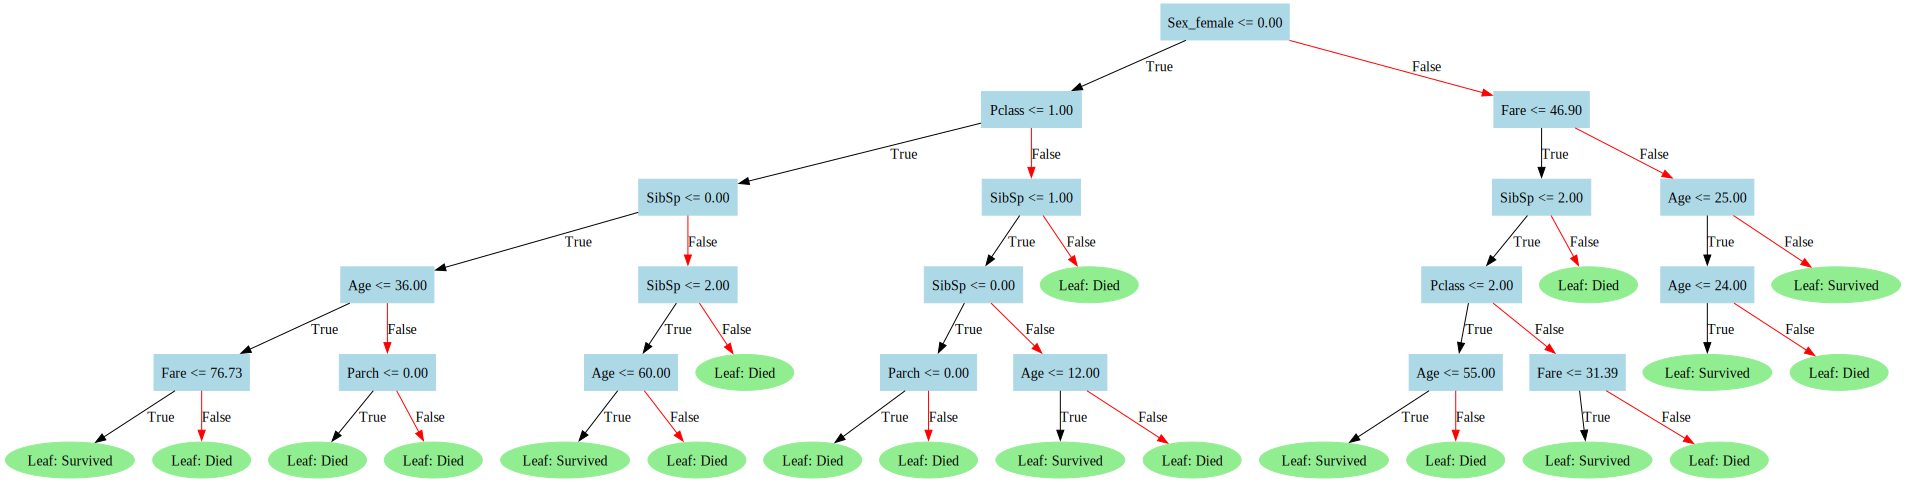

In [11]:
clf.visualize_tree(
    feature_names=X_train.columns.tolist(), class_names=["Died", "Survived"]
)

In [12]:
preds = clf.predict(X_test.values)

DEBUG:DecisionTreeClassifier:Starting prediction.
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 8, Threshold: False
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 4, Threshold: 46.9
DEBUG:DecisionTreeClassifier:Traversing left node. Feature: 1, Threshold: 25.0
DEBUG:DecisionTreeClassifier:Traversing left node. Feature: 1, Threshold: 24.0
DEBUG:DecisionTreeClassifier:Reached leaf node. Value: 1
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 8, Threshold: False
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 4, Threshold: 46.9
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 1, Threshold: 25.0
DEBUG:DecisionTreeClassifier:Reached leaf node. Value: 1
DEBUG:DecisionTreeClassifier:Traversing left node. Feature: 8, Threshold: False
DEBUG:DecisionTreeClassifier:Traversing left node. Feature: 0, Threshold: 1
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 2, Threshold: 0
DEBUG:DecisionTreeClassifier:Traversing lef

Model: Custom Decision Tree Classifier

DecisionTreeClassifier(max_depth=5, min_samples_split=15, max_features=5)

Accuracy: 0.7412587412587412

Precision: 0.7241379310344828

Recall: 0.6666666666666666

F1: 0.6942148760330579

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        80
           1       0.72      0.67      0.69        63

    accuracy                           0.74       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143

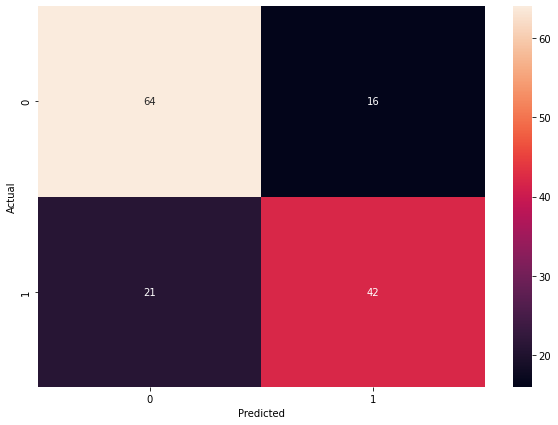


{
    'name': 'Custom Decision Tree Classifier',
    'model': DecisionTreeClassifier(max_depth=5, min_samples_split=15, max_features=5),
    'accuracy': 0.7412587412587412,
    'precision': 0.7241379310344828,
    'recall': 0.6666666666666666,
    'f1': 0.6942148760330579,
    'confusion_matrix': array([[64, 16],
       [21, 42]], dtype=int64)
}

In [15]:
print_evaluation_metrics(y_test, preds, clf, "Custom Decision Tree Classifier")

## Scikit-learn implementation

In [16]:
sklearn_clf = SklearnDecisionTreeClassifier(
    max_depth=5,
    min_samples_split=15,
    max_features=5,
    random_state=42,
    criterion="entropy",
)

sklearn_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=5,
                       min_samples_split=15, random_state=42)

In [17]:
sklearn_preds = sklearn_clf.predict(X_test)

Model: Sklearn Decision Tree Classifier

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=5,
                       min_samples_split=15, random_state=42)

Accuracy: 0.7762237762237763

Precision: 0.7924528301886793

Recall: 0.6666666666666666

F1: 0.7241379310344827

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        80
           1       0.79      0.67      0.72        63

    accuracy                           0.78       143
   macro avg       0.78      0.76      0.77       143
weighted avg       0.78      0.78      0.77       143

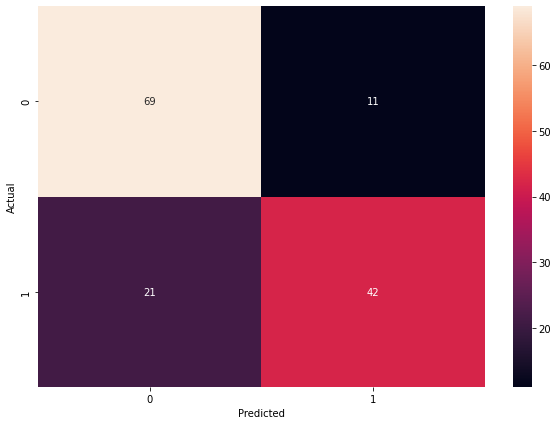


{
    'name': 'Sklearn Decision Tree Classifier',
    'model': DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=5,
                       min_samples_split=15, random_state=42),
    'accuracy': 0.7762237762237763,
    'precision': 0.7924528301886793,
    'recall': 0.6666666666666666,
    'f1': 0.7241379310344827,
    'confusion_matrix': array([[69, 11],
       [21, 42]], dtype=int64)
}

In [18]:
print_evaluation_metrics(
    y_test, sklearn_preds, sklearn_clf, "Sklearn Decision Tree Classifier"
)


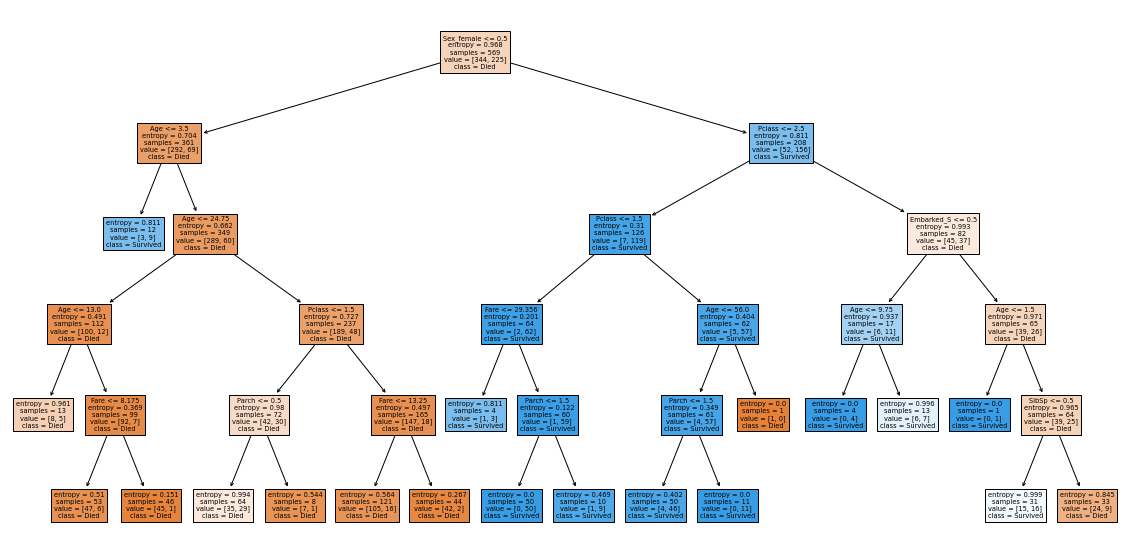

In [19]:
plt.figure(figsize=(20, 10))
sklearn_tree = plot_sklearn_tree(
    sklearn_clf,
    filled=True,
    feature_names=X_train.columns,
    class_names=["Died", "Survived"],
)

plt.show()


# Random Forest

## Custom implementation

In [20]:
rf_clf = CustomRandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=15,
    max_features=5,
    random_state=42,
    debug=False,
)

rf_clf.fit(X_train.values, y_train.values)
print(f"OOB Score: {rf_clf.oob_score_}")


OOB Score: 0.7873462214411248

In [21]:
rf_preds = rf_clf.predict(X_test.values)

Model: Custom Random Forest Classifier

RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=15, max_features=5)

OOB Score: 0.7873462214411248

Accuracy: 0.7902097902097902

Precision: 0.8666666666666667

Recall: 0.6190476190476191

F1: 0.7222222222222222

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        80
           1       0.87      0.62      0.72        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143

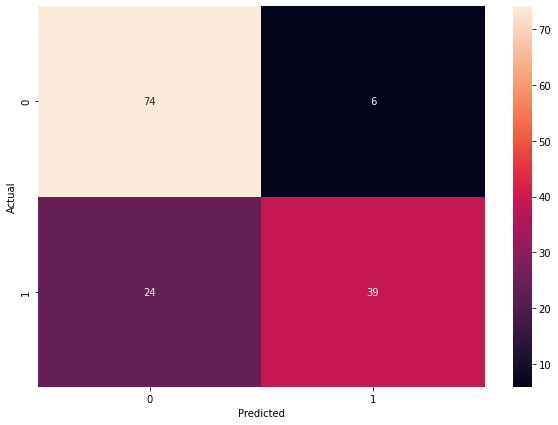


{
    'name': 'Custom Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=15, max_features=5),
    'accuracy': 0.7902097902097902,
    'precision': 0.8666666666666667,
    'recall': 0.6190476190476191,
    'f1': 0.7222222222222222,
    'confusion_matrix': array([[74,  6],
       [24, 39]], dtype=int64)
}

In [22]:
print_evaluation_metrics(y_test, rf_preds, rf_clf, "Custom Random Forest Classifier")

Visualizing tree 11...

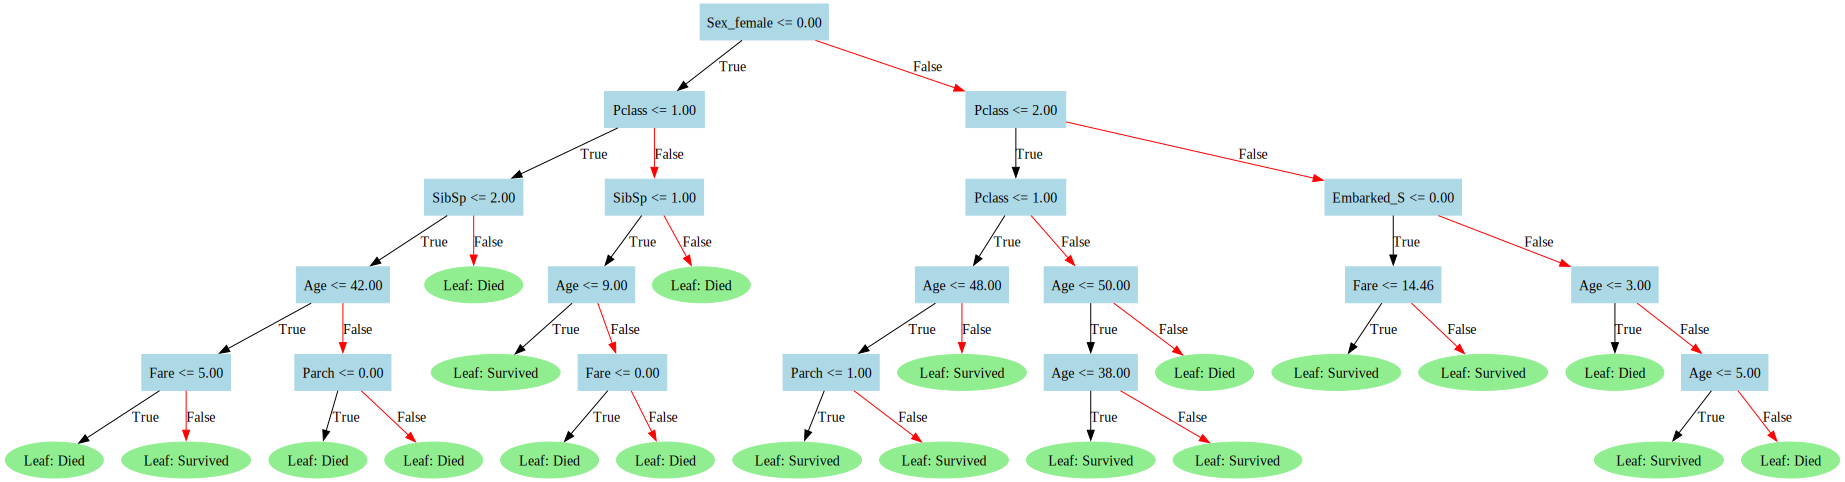

In [23]:
tree_idx = np.random.randint(0, rf_clf.n_estimators)

print(f"Visualizing tree {tree_idx}...")
rf_clf.trees[tree_idx].visualize_tree(
    feature_names=X_train.columns.tolist(), class_names={0: "Died", 1: "Survived"}
)


## Scikit-learn implementation

In [24]:
sklearn_rf_clf = SklearnRandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=15,
    max_features=10,
    random_state=42,
    oob_score=True,
    criterion="entropy",
    n_jobs=-1,
    verbose=1
)

sklearn_rf_clf.fit(X_train, y_train)
print(f'OOB Score: {sklearn_rf_clf.oob_score_}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


OOB Score: 0.8101933216168717

In [25]:
sklearn_rf_preds = sklearn_rf_clf.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Model: Scikit-Learn Random Forest Classifier

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_split=15, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=1)

OOB Score: 0.8101933216168717

Accuracy: 0.7972027972027972

Precision: 0.8695652173913043

Recall: 0.6349206349206349

F1: 0.7339449541284404

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        80
           1       0.87      0.63      0.73        63

    accuracy                           0.80       143
   macro avg       0.82      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143

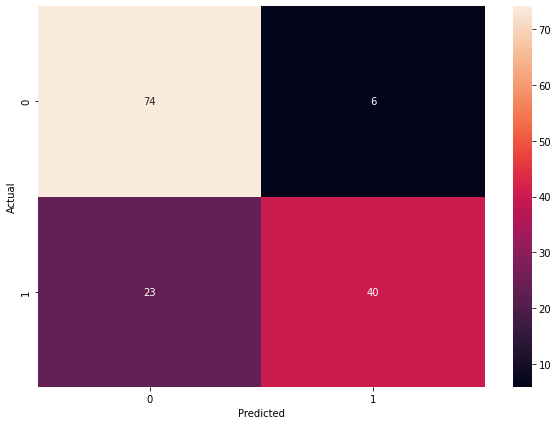


{
    'name': 'Scikit-Learn Random Forest Classifier',
    'model': RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_split=15, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=1),
    'accuracy': 0.7972027972027972,
    'precision': 0.8695652173913043,
    'recall': 0.6349206349206349,
    'f1': 0.7339449541284404,
    'confusion_matrix': array([[74,  6],
       [23, 40]], dtype=int64)
}

In [26]:
print_evaluation_metrics(
    y_test, sklearn_rf_preds, sklearn_rf_clf, "Scikit-Learn Random Forest Classifier"
)

Visualizing tree 11...

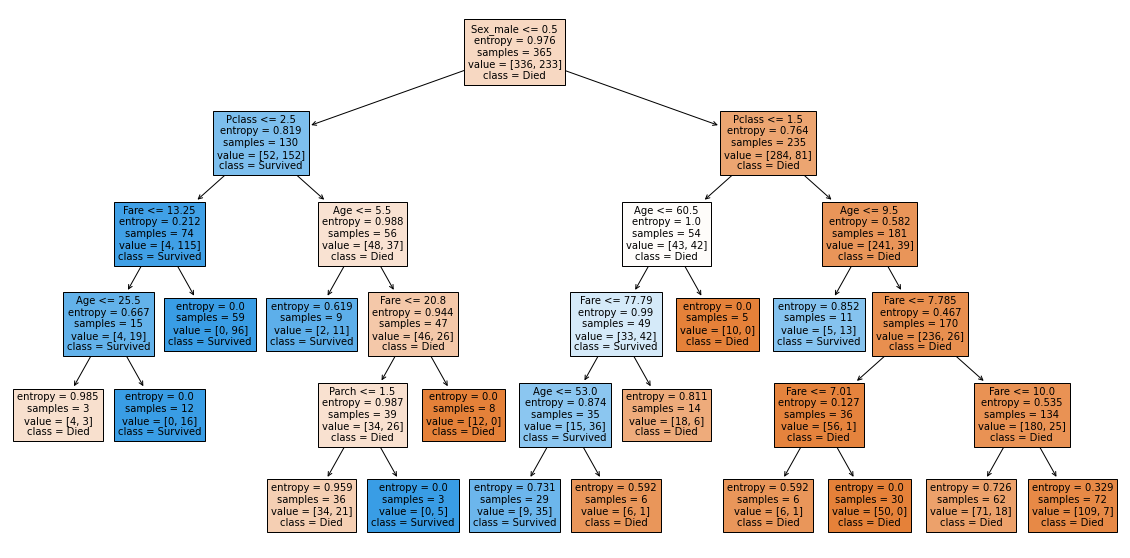

In [27]:
plt.figure(figsize=(20, 10))
print(f"Visualizing tree {tree_idx}...")
sklearn_rf_tree = plot_sklearn_tree(
    sklearn_rf_clf.estimators_[tree_idx],
    filled=True,
    feature_names=X_train.columns,
    class_names=["Died", "Survived"],
)

plt.show()